In [1]:
#!pip install pandas numpy 

In [2]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import regularizers

In [3]:
#Showing loaded data
file_path = '/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv'
imdb_data = pd.read_csv(file_path)
print(imdb_data.head(10))

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
5  Probably my all-time favorite movie, a story o...  positive
6  I sure would like to see a resurrection of a u...  positive
7  This show was an amazing, fresh & innovative i...  negative
8  Encouraged by the positive comments about this...  negative
9  If you like original gut wrenching laughter yo...  positive


In [4]:
#Data cleaning
# Encode sentiment labels as numeric values
imdb_data['sentiment'] = imdb_data['sentiment'].map({'positive': 1, 'negative': 0})

imdb_data['sentiment'] = imdb_data['sentiment'].astype(int)
def clean_text(text):
    text = re.sub('<br />', ' ', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Keep only letters
    text = text.lower()  # Convert to lowercase
    return text
imdb_data['review'] = imdb_data['review'].apply(clean_text)
imdb_data.head(10)

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production the filming te...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically theres a family where a little boy j...,0
4,petter matteis love in the time of money is a ...,1
5,probably my alltime favorite movie a story of ...,1
6,i sure would like to see a resurrection of a u...,1
7,this show was an amazing fresh innovative ide...,0
8,encouraged by the positive comments about this...,0
9,if you like original gut wrenching laughter yo...,1


In [5]:
#Splitting the data
X = imdb_data['review']
y = imdb_data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

print(f"Training set: {len(X_train)} reviews")
print(f"Testing set: {len(X_test)} reviews")
print(f"Training set: {len(y_train)} sentiments")
print(f"Testing set: {len(y_test)} sentiments")

Training set: 42500 reviews
Testing set: 7500 reviews
Training set: 42500 sentiments
Testing set: 7500 sentiments


In [6]:
#Text Vectorization
# Initialize the tokenizer
tokenizer = Tokenizer(num_words=10000)  # Use the top 10,000 words
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to the same length
maxlen = 100  # Maximum review length
X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen)
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen)

print(f"Padded training data shape: {X_train_pad.shape}")
print(f"Padded testing data shape: {X_test_pad.shape}")

Padded training data shape: (42500, 100)
Padded testing data shape: (7500, 100)


<font size = 5 color = 'red'>Building and training an RNN model using an LSTM layer for sentiment analysis</font>

In [7]:
model = Sequential([
    Embedding(input_dim=10000, output_dim=200, input_length=100),
    Dropout(0.4),
    Bidirectional(LSTM(128, dropout=0.4, recurrent_dropout=0.4, kernel_regularizer=regularizers.l2(0.01))),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.0003), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.00001)

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Training the model
history = model.fit(
    X_train_pad, y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/20
532/532 ━━━━━━━━━━━━━━━━━━━━ 135s 240ms/step - accuracy: 0.5781 - loss: 3.8701 - val_accuracy: 0.7675 - val_loss: 0.6289 - learning_rate: 3.0000e-04
Epoch 2/20
532/532 ━━━━━━━━━━━━━━━━━━━━ 126s 237ms/step - accuracy: 0.7286 - loss: 0.6493 - val_accuracy: 0.6728 - val_loss: 0.6224 - learning_rate: 3.0000e-04
Epoch 3/20
532/532 ━━━━━━━━━━━━━━━━━━━━ 127s 239ms/step - accuracy: 0.7668 - loss: 0.5833 - val_accuracy: 0.7246 - val_loss: 0.6277 - learning_rate: 3.0000e-04
Epoch 4/20
532/532 ━━━━━━━━━━━━━━━━━━━━ 126s 237ms/step - accuracy: 0.7510 - loss: 0.5927 - val_accuracy: 0.7946 - val_loss: 0.5273 - learning_rate: 3.0000e-04
Epoch 5/20
532/532 ━━━━━━━━━━━━━━━━━━━━ 126s 236ms/step - accuracy: 0.7960 - loss: 0.5471 - val_accuracy: 0.8198 - val_loss: 0.4966 - learning_rate: 3.0000e-04
Epoch 6/20
532/532 ━━━━━━━━━━━━━━━━━━━━ 127s 238ms/step - accuracy: 0.8223 - loss: 0.4923 - val_accuracy: 0.8234 - val_loss: 0.4762 - learning_rate: 3.0000e-04
Epoch 7/20
532/532 ━━━━━━━━━━━━━━━━━━━━ 

In [9]:
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.8537 - loss: 0.3810
Test Accuracy: 85.72%


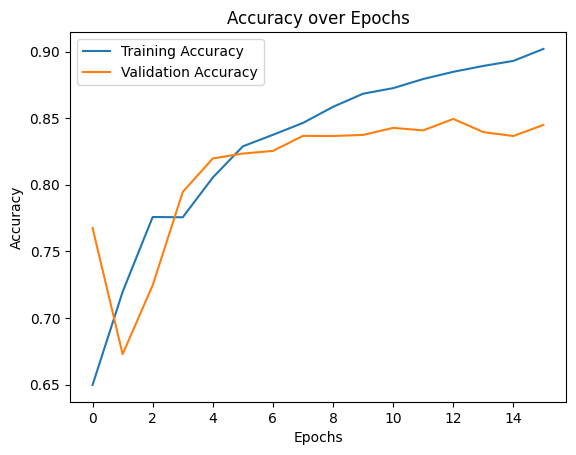

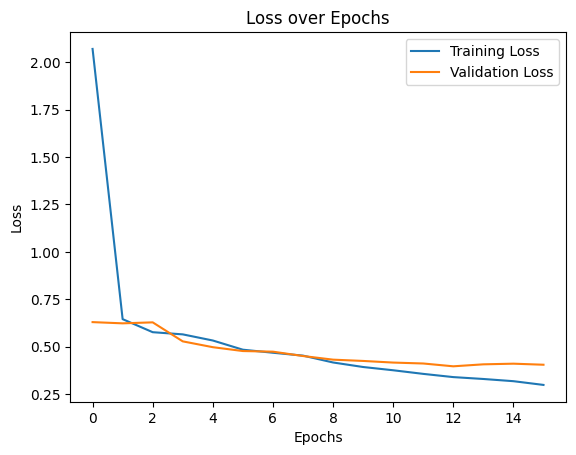

In [10]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
